# Challenge Description

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you? 

<img src="imgs/header.png" width="800" />

…it's not just a guess drawn out of the hat. There is an algorithm behind it.

With this context, EDSA challenged us to construct a `recommendation algorithm` based on `content` or `collaborative filtering`, capable of accurately predicting how a user will `rate` a movie they have not yet viewed based on their historical preferences.

**What value is achieved through building a functional recommender system?**

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.
<img src="imgs/recommendation-system.webp" width="600" />


# Dataset Description
### Data Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes. 

### Source

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

### Supplied Files

- genome_scores.csv - a score mapping the strength between movies and tag-related properties.
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### Project Objectives

- To develop an efficient movie recommender system.
- To compare contest-based and collaborating filtering in.
- To create an unsupervised machine learning model with RSME lower than 0.85 on the test set.

### Submission Format
For every author in the dataset, submission files should contain two columns: Id and rating. Id is a `concatenation` of the userID and movieID given in the test file (using an _ character). rating is the predicted rating for a given user-movie pair

The file should contain a header and have the following format:<br>
`Id,rating` <br>
`1_2011,1.0`
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Loading Comet & Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

<a href=#eight>8. References</a>

 <a id="one"></a>
### 1. Connecting Comet
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading Comet ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used to save the notebook version in comet. |

###  Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import cufflinks as cf
import re
import scipy as sp

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import offsetbox
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import surprise    # Run "!pip install surprise" on new cell to download
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import accuracy
import plotly.express as px
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

from time import time    # Import time to measure algorithm runtime

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import mean_squared_error

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
 
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the files into DataFrames. |

---

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
imdb = pd.read_csv('imdb_data.csv')
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [4]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [5]:
genome_tags = pd.read_csv('genome_tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [6]:
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [8]:
# For building the recommender system
train = pd.read_csv('train.csv')
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [9]:
test = pd.read_csv('test.csv')
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
#sample_sub = pd.read_csv('sample_submission.csv')
#print(sample_sub.shape)
#sample_sub.head()

From the above cell, it is noted that the sample submission should consist of ~5M rows, and 2 columns.

<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### Using a For Loop to check the shape of each dataframe.

In [11]:
list_of_all_dataframes = [ movies, imdb, tags, links, genome_scores, genome_tags, train, test ]

for each in list_of_all_dataframes:
    print(each.shape)
# https://stackoverflow.com/questions/68158905/using-for-loop-to-print-shape-of-multiple-dataframes

(62423, 3)
(27278, 6)
(1093360, 4)
(62423, 3)
(15584448, 3)
(1128, 2)
(10000038, 4)
(5000019, 2)


From above, it is observed that:
- movies has ~63 500 rows, and 3 columns
- imdb has ~27 300 rows, and 6 columns
- tags has ~1.1M rows, and 4 columns
- links has ~62 300 rows, and 3 columns
- genome_scores has ~15.6M rows, and 3 columns
- genome_tags has ~1100 rows, and 2 columns
- train has ~10M rows, and 4 columns
- test has ~5M rows, and 2 columns

In [11]:
# Let's look at a distribution of the ratings given by users. Here we see that viewers generally are 
# on the kinder end of the rating spectrum, with a far higher proportion of positive reviews (> 3) 
# being given over negative ones (< 3):

#with sns.axes_style('white'):
#    g = sns.factorplot("rating", data=train, aspect=2.0,kind='count')
#    g.set_ylabels("Total number of ratings")
#print (f'Average rating in dataset: {np.mean(train["rating"])}')

### Let's see the vote average

In [12]:
average_rating = round(train.rating.mean(),2)  # To 2 decimal places
average_rating

3.53

From the more than 10M ratings that we have, the average rating in 3.53.

### Checking how many null values there are in each column of each dataframe

In [14]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [15]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [16]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [17]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [18]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [19]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [20]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [21]:
test.isnull().sum()

userId     0
movieId    0
dtype: int64

### Visualizing the missing values columns in the dataframe that had a significant amount of missing values

Text(0.5, 1.0, 'MISSING VALUES IN EACH COLUMN')

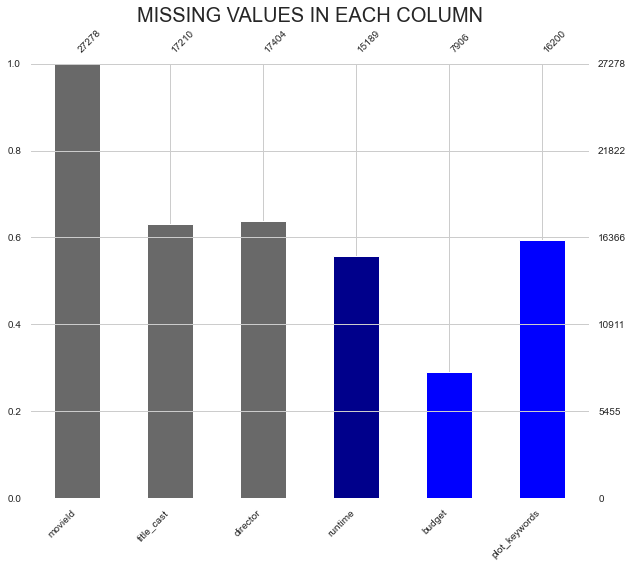

In [22]:
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(imdb,fontsize=10,color=color,figsize=(10,8))
plt.title('MISSING VALUES IN EACH COLUMN',fontsize=20)

In [23]:
df_budget = imdb.sort_values(by='budget',ascending=False)
print(df_budget.budget)

14584    ZAR10,000,000
23579     VEB4,273,248
24115        UAH10,000
24673    TWD50,000,000
15111    TWD45,000,000
             ...      
27271              NaN
27273              NaN
27275              NaN
27276              NaN
27277              NaN
Name: budget, Length: 27278, dtype: object


In [25]:
movies_ =imdb.sort_values(by='budget',ascending=False)
print(movies_.budget.str[0:3].unique())

['ZAR' 'VEB' 'UAH' 'TWD' 'TRL' 'THB' 'SIT' 'SGD' 'SEK' 'RUR' 'PTE' 'PLN'
 'PHP' 'NZD' 'NOK' 'NLG' 'NGN' 'MYR' 'MXN' 'LVL' 'LTL' 'KRW' 'JPY' 'ITL'
 'ISK' 'IRR' 'INR' 'ILS' 'IDR' 'HUF' 'HKD' 'GBP' 'FRF' 'FIM' 'EUR' 'ESP'
 'EGP' 'DKK' 'DEM' 'CZK' 'COP' 'CNY' 'CLP' 'CHF' 'CAD' 'BRL' 'BND' 'BGL'
 'BEF' 'AUD' 'ATS' 'ARS' '$99' '$98' '$95' '$94' '$93' '$92' '$90' '$9,'
 '$89' '$88' '$87' '$86' '$85' '$84' '$83' '$82' '$81' '$80' '$8,' '$79'
 '$78' '$76' '$75' '$74' '$73' '$72' '$71' '$70' '$7,' '$69' '$68' '$67'
 '$66' '$65' '$64' '$63' '$62' '$61' '$60' '$6,' '$6' '$59' '$58' '$57'
 '$56' '$55' '$54' '$53' '$52' '$51' '$50' '$5,' '$5' '$49' '$48' '$47'
 '$46' '$45' '$44' '$43' '$42' '$41' '$40' '$4,' '$4' '$39' '$38' '$37'
 '$36' '$35' '$34' '$33' '$32' '$31' '$30' '$3,' '$29' '$28' '$27' '$26'
 '$25' '$24' '$23' '$22' '$21' '$20' '$2,' '$19' '$18' '$17' '$16' '$15'
 '$14' '$13' '$12' '$11' '$10' '$1,' '$0' nan]


It is observed that the `budget` column has different units:
- ZAR
- $
- VEB
- UAH
- TWD
- TRL
- THB 
- SIT 
- SGD 
- SEK
- RUR 
- PTE
- PLN
- PHP
- NZD
- NOK
- NLG
- NGN
- MYR
- MXN
- LVL
- LTL
- KRW
- JPY
- ITL
- ISK
- IRR
- INR
- ILS
- IDR
- HUF'
- HKD
- GBP
- FRF
- FIM
- EUR
- ESP
- EGP
- DKK
- DEM
- CZK
- COP
- CNY
- CLP
- CHF
- CAD
- BRL
- BND
- BGL
- BEF
- AUD
- ATS
- ARS
- as well as null values

### Visualizing the most popular Genres

In [26]:
# Create dataframe containing only the movieId and genres
movies_genres_split = pd.DataFrame(movies[['movieId', 'genres']],columns=['movieId', 'genres'])

# Splitting the genres seperated by "|". Movie-genre combinations are stored as a list
movies_genres_split.genres = movies_genres_split.genres.apply(lambda x: x.split('|'))

# Creating the expanded dataframe where each movie-genre combination is in a seperate row
movies_genres_split = pd.DataFrame([(x.movieId, d) for x in movies_genres_split.itertuples() for d in x.genres],
                             columns=['movieId', 'genres'])

In [29]:
movies_genres_split.head(10)

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


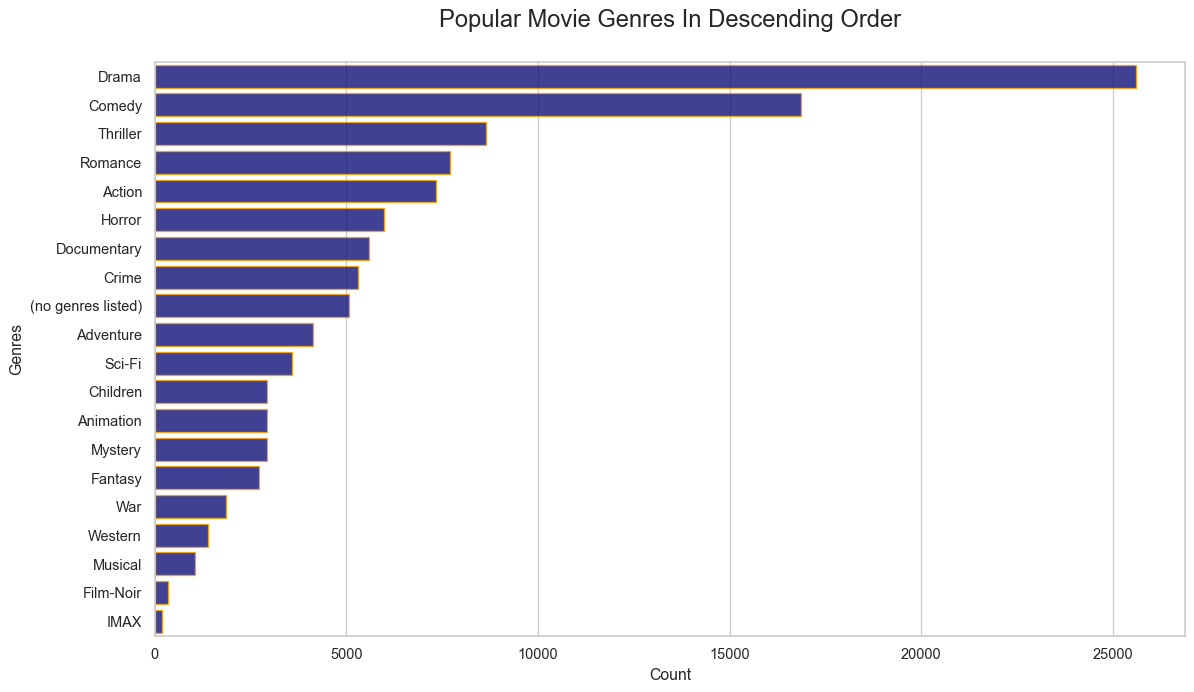

In [28]:
# Ploting the genres in descending order
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres In Descending Order\n', fontsize=18)
sns.countplot(y="genres", data=movies_genres_split,order=movies_genres_split['genres']
              .value_counts(ascending=False).index, color='darkblue', ec= 'orange', alpha=0.8)
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

In [31]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,62423.0,122220.387646,63264.744844,1.0,82146.5,138022.0,173222.0,209171.0


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


### Checking the average rating of each movie

In [36]:
# getting the average rating for all the ratings related to a specific movie title.
# movies.groupby(by='title')['rating'].mean()

In [25]:
# Sorting the movies from highest average rating to the lowest rating
df.groupby(by='title')['rating'].mean().sort_values(ascending=False)

title
Then I Sentenced Them All to Death (Atunci i-am condamnat pe toti la moarte) (1972)    5.0
Vietnam in HD (2011)                                                                   5.0
Souper, Le (Supper, The) (1992)                                                        5.0
Shadow People  (2007)                                                                  5.0
Child I Never Was, The (Leben lang kurze Hosen Tragen, Ein) (2002)                     5.0
                                                                                      ... 
The Adventures of Tom Thumb & Thumbelina (2002)                                        0.5
Dinoshark (2010)                                                                       0.5
Beautiful Girl (2014)                                                                  0.5
Beethoven's Big Break (2008)                                                           0.5
Whoregasm (1988)                                                                    

From above, it seems as though there some movies that are highly rated. Would it be a good idea to just watch the movie based on it's average rating? Let's find out!

- Below, wethe no. of people that rated each movie is explored.

In [26]:
df.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
                                    ...  
Amnèsia (2002)                          1
Saving Lincoln (2013)                   1
Joulupukki ja noitarumpu (1996)         1
Club Sandwich (2013)                    1
Otakus in Love (2004)                   1
Name: rating, Length: 13795, dtype: int64

Let's take for example, the movie called `Vietnam in HD(2011)`, which has an average rating of 5.0, and observe how many people actually rated this movie.

In [31]:
df[df['title'] == "Vietnam in HD (2011)"].groupby(by='title')['rating'].count()

title
Vietnam in HD (2011)    1
Name: rating, dtype: int64

It is observed that the movie was rated by only 1 person. Mhm, not too much confidence for recommending the movie to someone else, right?

Let's now take a look at another movie, such as `Forest Gump (1994)`

In [30]:
df[df['title'] == "Forrest Gump (1994)"].groupby(by='title')['rating'].mean()

title
Forrest Gump (1994)    4.047216
Name: rating, dtype: float64

The above movie has an average rating of 4, and was rated by 32 381 people. This would definitely be a better movie to recommend than the first movie.

In [34]:
df.runtime.mode(), df.runtime.mean()

(0    101.0
 Name: runtime, dtype: float64,
 116.12350948011952)

From above, it is observed that the modal run time is 101 minutes, and the average run time is 116 minutes.

In [35]:
df.budget.mode()

0    $30,000,000
Name: budget, dtype: object

In [22]:
df['runtime'] = df['runtime'].fillna(df['runtime'].mode()[0])
df['budget'] = df['budget'].fillna(df['budget'].mode()[0])

In [39]:
df.isnull().sum()

movieId               0
title                 0
genres                0
title_cast            0
director              0
runtime           49046
budget           543399
plot_keywords         0
userId                0
rating                0
timestamp             0
dtype: int64

- All the missing values in the dataset have either been removed or filled.

In [24]:
df.duplicated().sum()

0

- The dataset has 0 duplicated values.

In [25]:
df['rating'].value_counts()

4.0    1805763
3.0    1417143
5.0     922566
3.5     917158
4.5     611282
2.0     485208
2.5     381174
1.0     236094
1.5     124549
0.5     120173
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

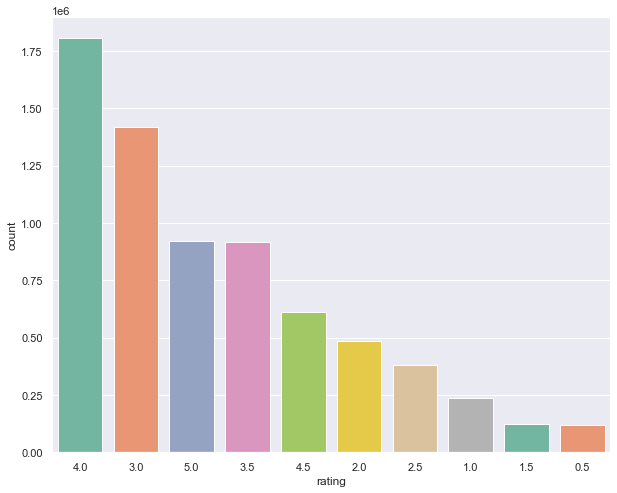

In [58]:
#MOVIES RATINGS
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= df, palette="Set2", order=df['rating'].value_counts().index[0:10])

<AxesSubplot:xlabel='runtime', ylabel='Density'>

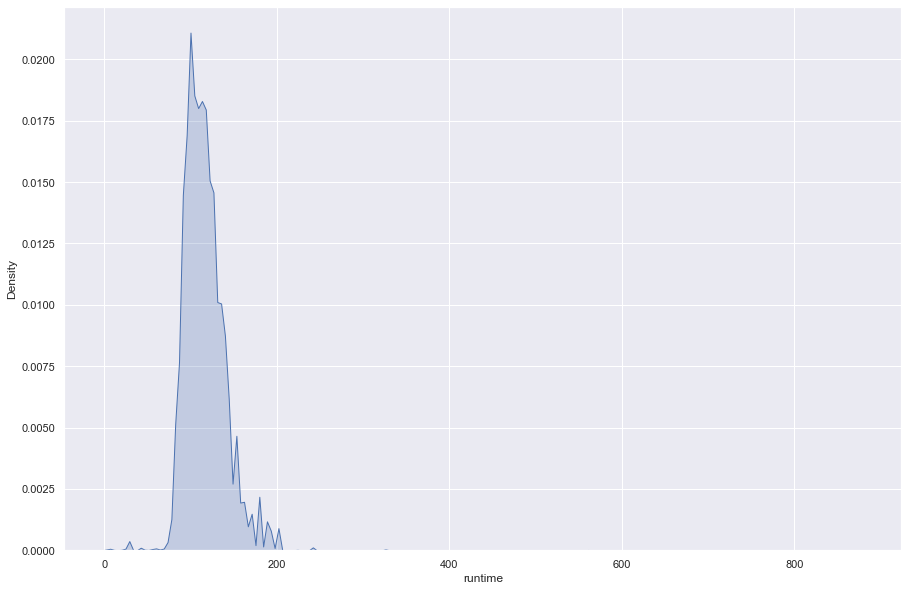

In [26]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['runtime'], shade=True)

- It is observed that a good amount of movies have a run time of around 75-120 minutes.
- Very few movies have a runtime of less than 50 minutes, or more than 200 minutes

<a id="four"></a>
### 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
### 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modeling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more unsupervised models that are able to accurately predict how a user will  rate a movie they have not viewed based on historical preferences. |

---

<a id="six"></a>
### 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models and comment on what model is the best and why. |

---

 <a id="seven"></a>
### 7. Conclusion
<a href=#cont>Back to Table of Contents</a>

 <a id="eight"></a>
### 8. Resources
<a href=#cont>Back to Table of Contents</a>

- https://www.enjoyalgorithms.com/blog/recommender-system-using-machine-learning
- https://www.datacamp.com/tutorial/recommender-systems-python
- https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
- https://realpython.com/build-recommendation-engine-collaborative-filtering/ (Models)